In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=61882c4e4049185da115d16eab0beb9520bbc7376fa5a5484e7641cfcfd5b6f9
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=1f373c88058eaf124d1f5403b94b32812b04fc0817b1309b4353b80a4885732f
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import  cdist
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA,KernelPCA, FactorAnalysis, FastICA, TruncatedSVD
from sklearn.manifold import  TSNE, Isomap, MDS, LocallyLinearEmbedding, SpectralEmbedding
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import umap
plt.style.use('seaborn-v0_8')
url = 'https://raw.githubusercontent.com/luisemmanuelavilaleon/MEIA-Retos/main/Datasets/codon_usage.csv'
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv(url, delimiter='\t', header = None)

In [ ]:
data.head()
print(data.shape)

(4924, 64)


In [ ]:
X = data.values
sc = StandardScaler()
sc.fit(X)
X_std = sc.fit_transform(data.values)

In [ ]:
def transform_and_plot(X, reducer):
    X_transformed = reducer.fit_transform(X)

    fig, ax = plt.subplots()
    ax.scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.7, color = 'mediumslateblue', marker = 'o', s = 25)
    ax.set_xlabel('Componente Principal 1')
    ax.set_ylabel('Componente Principal 2')
    ax.set_title(f'Datos Transformados mediante: {str(reducer).split("(")[0]}')
    plt.show()

    return X_transformed

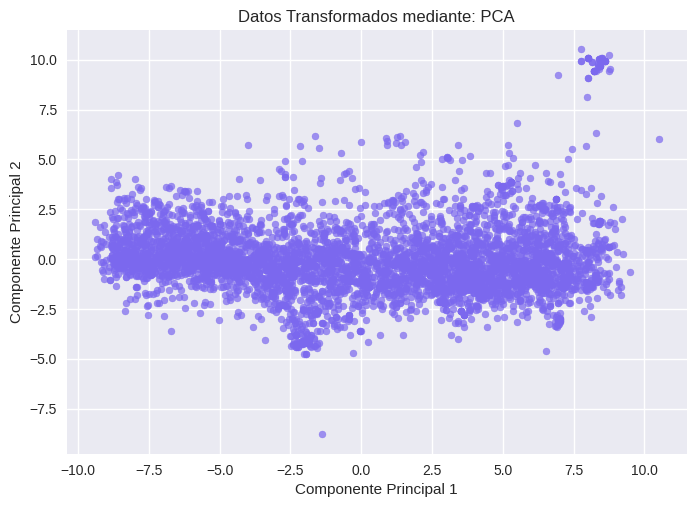

In [ ]:
pca = PCA(n_components=2, random_state=42)
X_pca = transform_and_plot(X_std, pca)

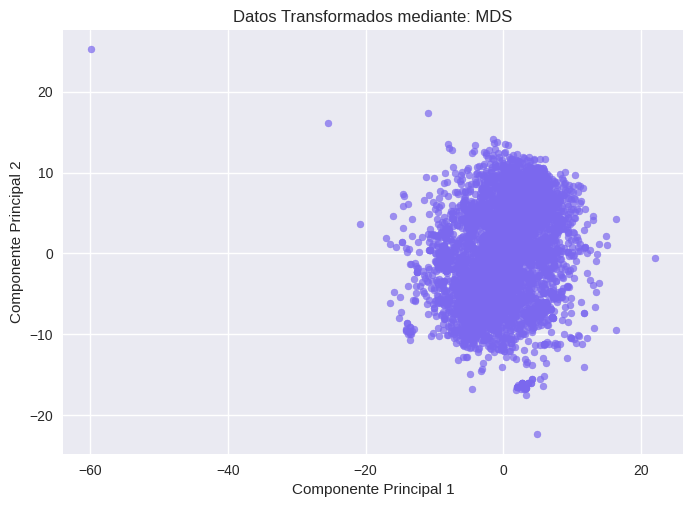

In [ ]:
mds = MDS(n_components=2, random_state=42, n_jobs=4)
X_mds = transform_and_plot(X_std, mds)

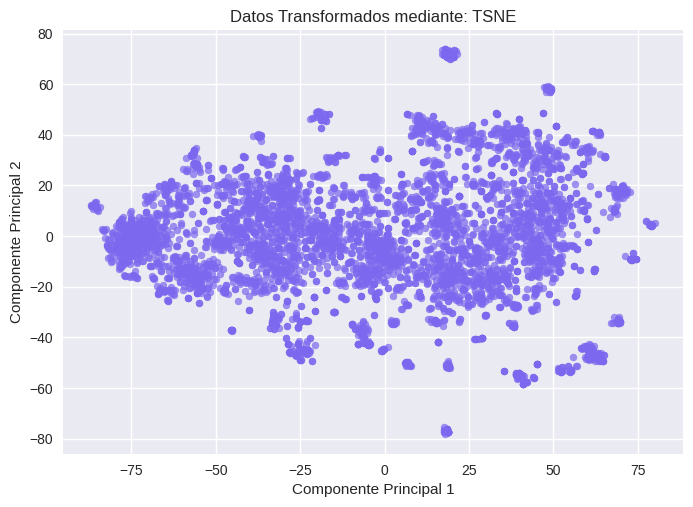

In [ ]:
tsne = TSNE(random_state=42)
X_tsne = transform_and_plot(X_std, tsne)

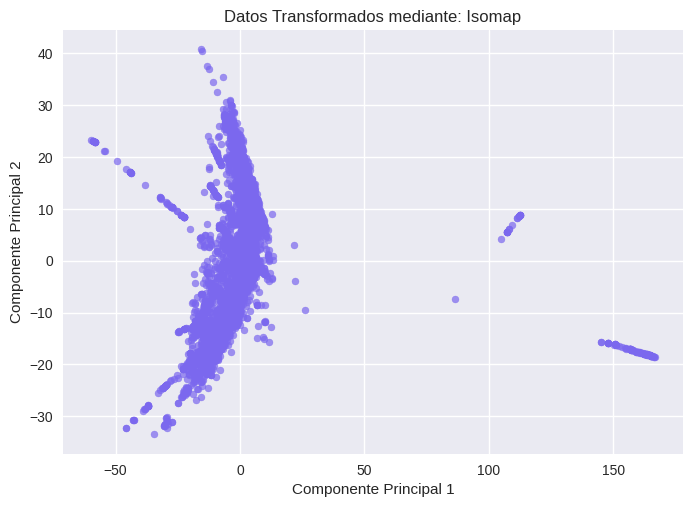

In [ ]:
ism = Isomap(n_components=2)
X_ism = transform_and_plot(X_std, ism)

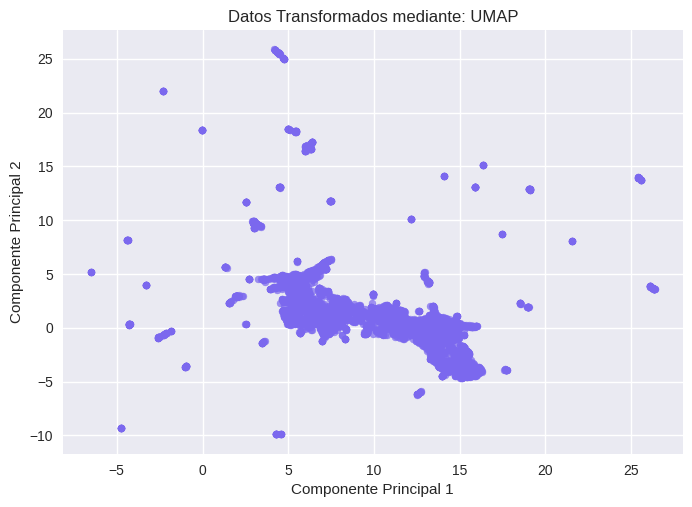

In [ ]:
rumap = umap.UMAP(random_state=42)
X_umap = transform_and_plot(X_std, rumap)

## K-means

In [ ]:
def find_cluester(X):
  max_clusters = 10
  inertias = []
  for k in range(1, max_clusters+1):
      kmeans = KMeans(n_clusters=k, random_state=0)
      kmeans.fit(X)
      inertias.append(kmeans.inertia_)

  fig, ax = plt.subplots()
  ax.plot(range(1, max_clusters+1), inertias, marker='o')
  ax.set_xlabel('Número de centroides')
  ax.set_ylabel('Inercia')
  ax.set_title('Método del codo')
  plt.show()

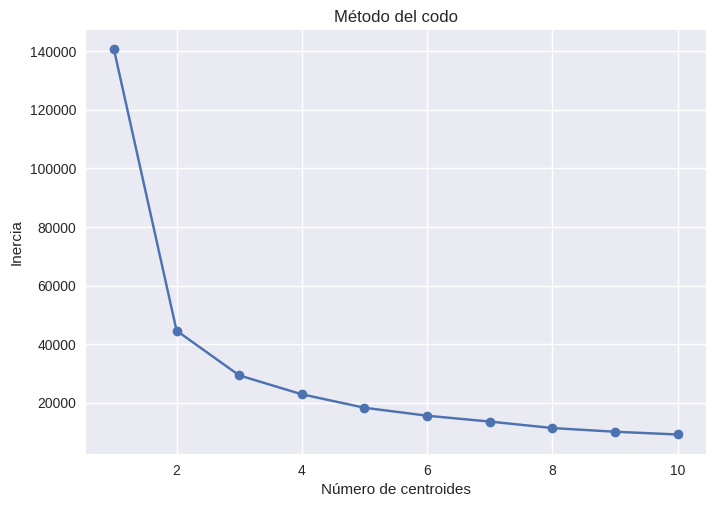

In [ ]:
find_cluester(X_pca)

In [ ]:
def plot_clusters_with_outliers(num_clusters, X, umbral):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_

    distances = cdist(X, kmeans.cluster_centers_, 'euclidean')
    avg_distances = np.mean(distances, axis=1)

    threshold = np.mean(avg_distances) + umbral * np.std(avg_distances)

    outliers = np.where(avg_distances > threshold)[0]

    fig, ax = plt.subplots()
    ax.scatter(X[:, 0], X[:, 1], alpha=0.7, c=labels, cmap = 'winter', marker = 'o', s = 25)
    ax.scatter(X[outliers, 0], X[outliers, 1], color ='orangered', marker = 'H',label='Datos anómalos')
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='black', label='centroides')
    ax.set_xlabel('Componente Principal 1')
    ax.set_ylabel('Componente Principal 2')
    ax.set_title('Grupos generados por K-means')
    ax.legend()
    plt.show()

    return outliers

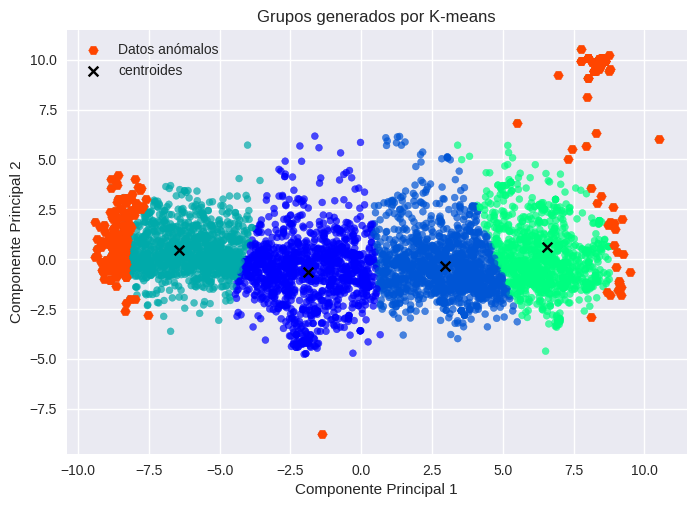

(248,)


In [ ]:
outliers_pca = plot_clusters_with_outliers(4, X_pca, 1.75)
print(outliers_pca.shape)

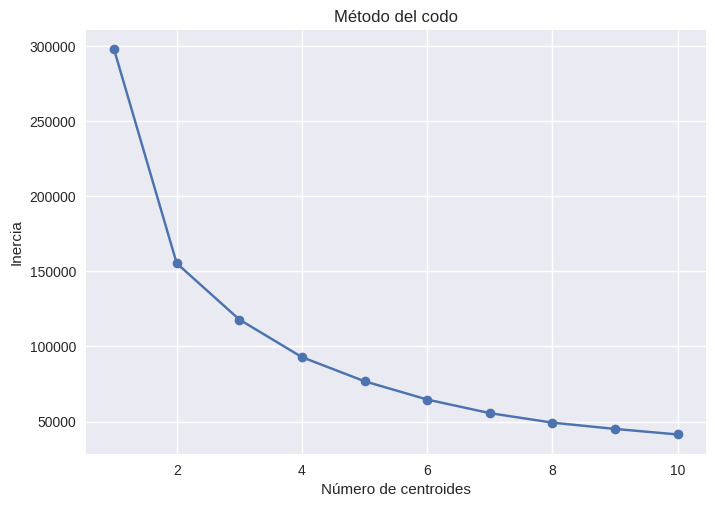

In [ ]:
find_cluester(X_mds)

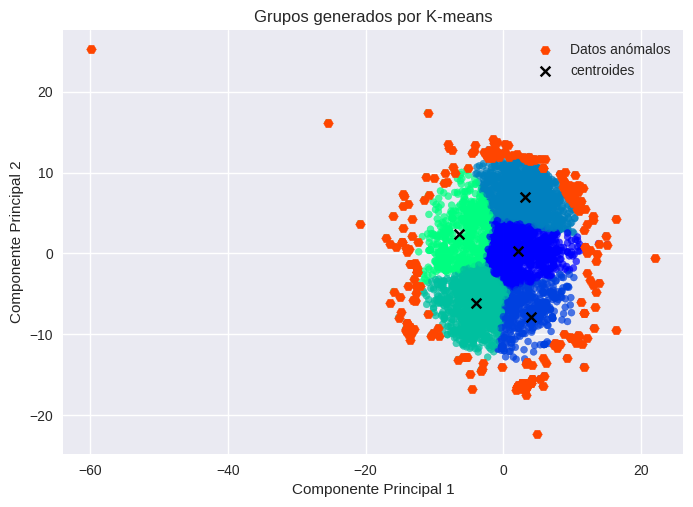

(231,)


In [ ]:
outliers_mds = plot_clusters_with_outliers(5, X_mds, 1.75)
print(outliers_mds.shape)

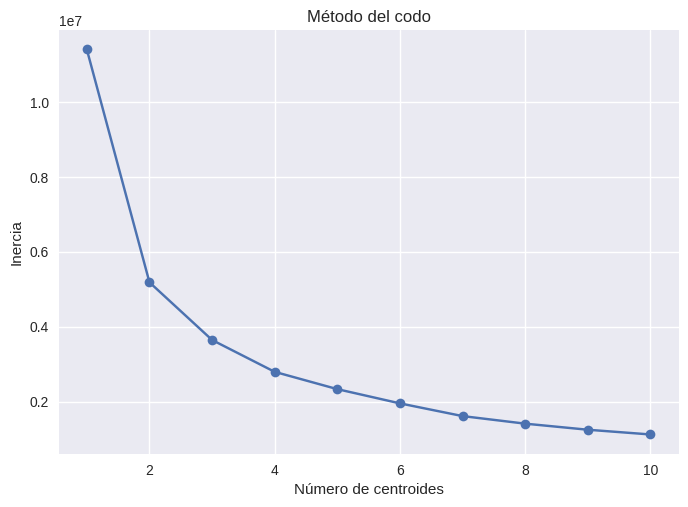

In [ ]:
find_cluester(X_tsne)

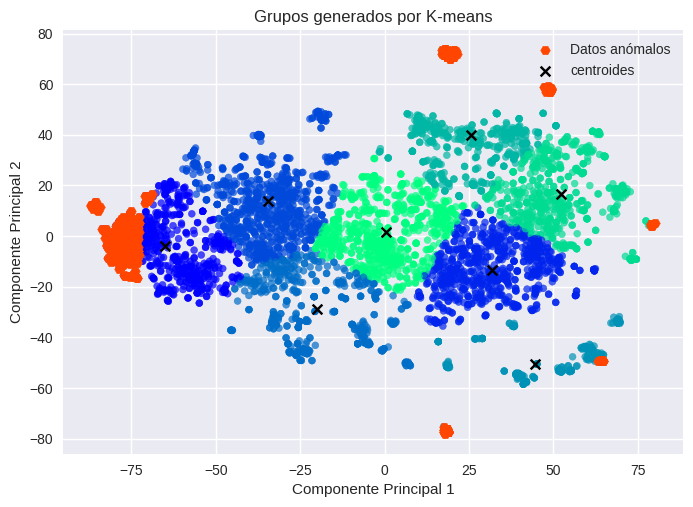

(339,)


In [ ]:
outliers_tsne = plot_clusters_with_outliers(8, X_tsne, 1.75)
print(outliers_tsne.shape)

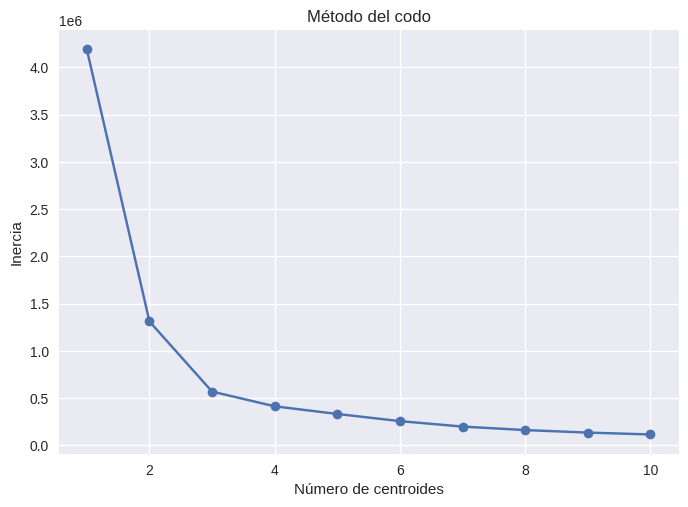

In [ ]:
find_cluester(X_ism)

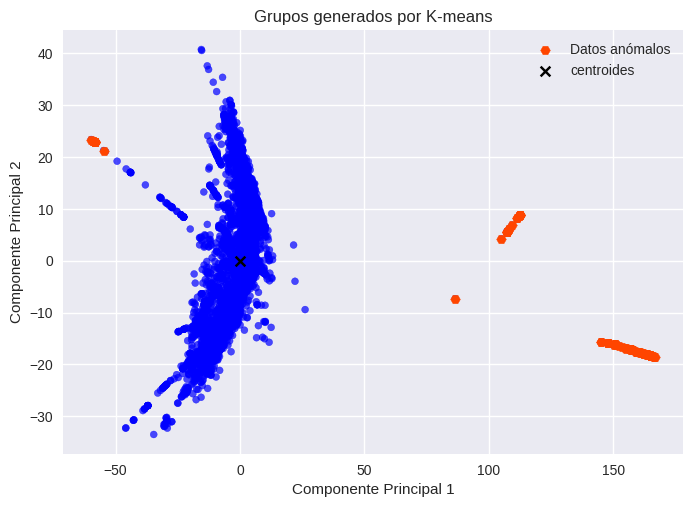

(137,)


In [ ]:
outliers_ism = plot_clusters_with_outliers(1, X_ism, 1.75)
print(outliers_ism.shape)

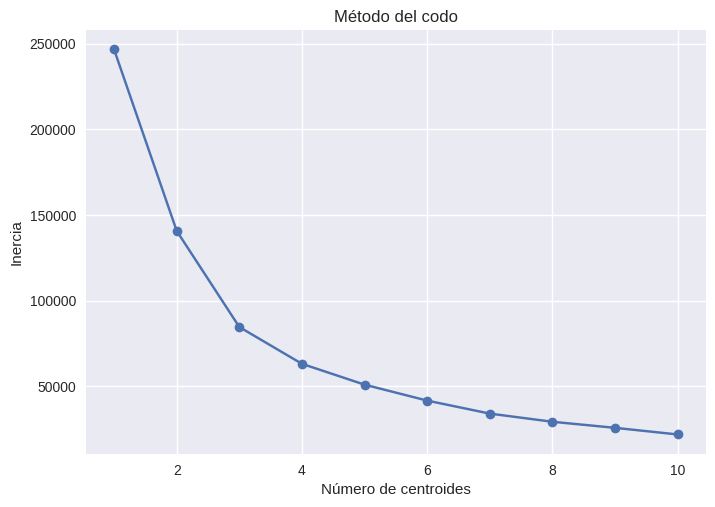

In [ ]:
find_cluester(X_umap)

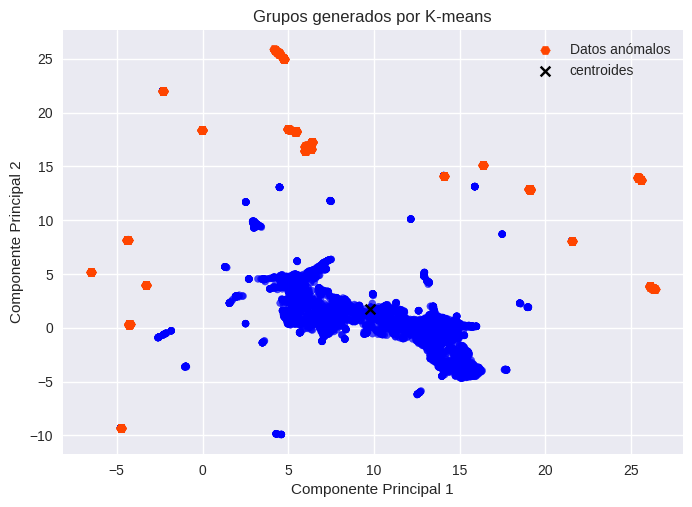

(350,)


In [ ]:
outliers_umap = plot_clusters_with_outliers(1, X_umap, 1.75)
print(outliers_umap.shape)

In [ ]:
from collections import defaultdict

def count_and_filter(k, *arrays):
    counter = defaultdict(int)

    for array in arrays:
        for element in array:
            counter[element] += 1

    result = [key for key, value in counter.items() if value > k]

    return result

In [ ]:
outliers_kmeans = count_and_filter(2, outliers_pca , outliers_mds, outliers_mds, outliers_ism, outliers_umap)

In [ ]:
len(outliers_kmeans)

116

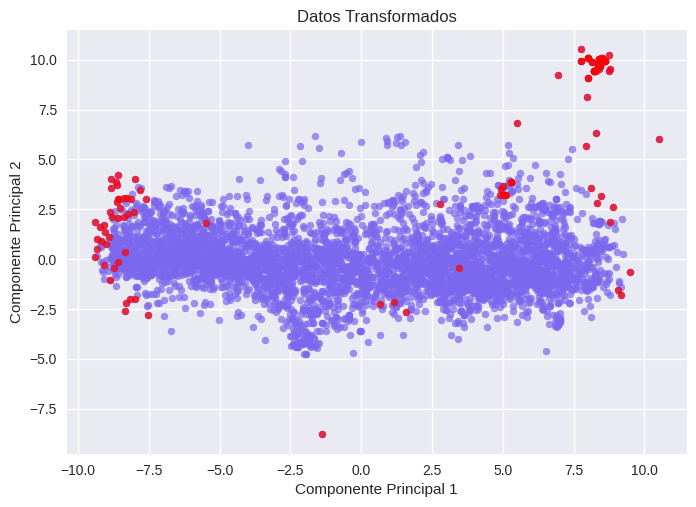

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, color = 'mediumslateblue', marker = 'o', s = 25)
ax.scatter(X_pca[outliers_kmeans, 0], X_pca[outliers_kmeans, 1], alpha=0.7, color = 'red', marker = 'o', s = 25)
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_title(f'Datos Transformados')
plt.show()

### Distancia al vecino mas cercano

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

def detect_outliers(X, k):
    lof = LocalOutlierFactor(n_neighbors=k)
    outlier_scores = lof.fit_predict(X)

    outlier_indices = np.where(outlier_scores == -1)[0]

    return outlier_indices

In [ ]:
outliers_pca = detect_outliers(X_pca, 100)

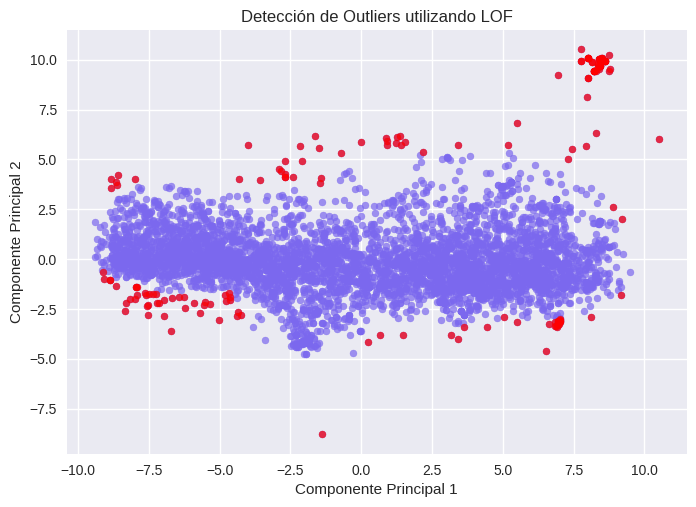

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, color = 'mediumslateblue', marker = 'o', s = 25)
ax.scatter(X_pca[outliers_pca, 0], X_pca[outliers_pca, 1], alpha=0.7, color = 'red', marker = 'o', s = 25)
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_title('Detección de Outliers utilizando LOF')
plt.show()

In [ ]:
outliers_mds = detect_outliers(X_mds, 100)

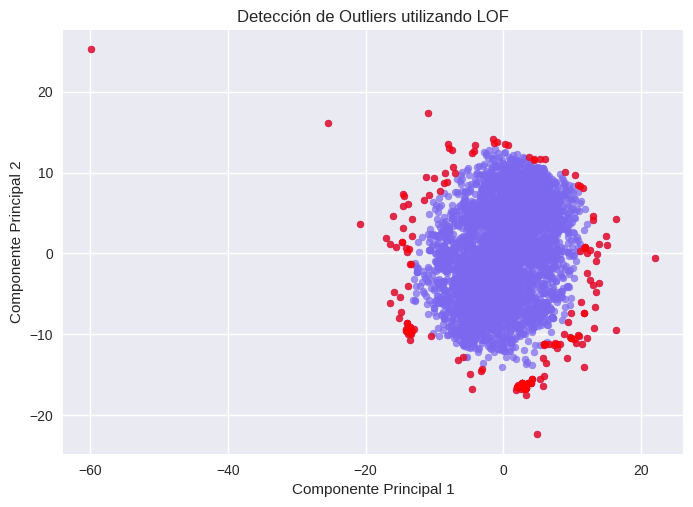

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_mds[:, 0], X_mds[:, 1], alpha=0.7, color = 'mediumslateblue', marker = 'o', s = 25)
ax.scatter(X_mds[outliers_mds, 0], X_mds[outliers_mds, 1], alpha=0.7, color = 'red', marker = 'o', s = 25)
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_title('Detección de Outliers utilizando LOF')
plt.show()

In [ ]:
outliers_tsne = detect_outliers(X_tsne, 100)

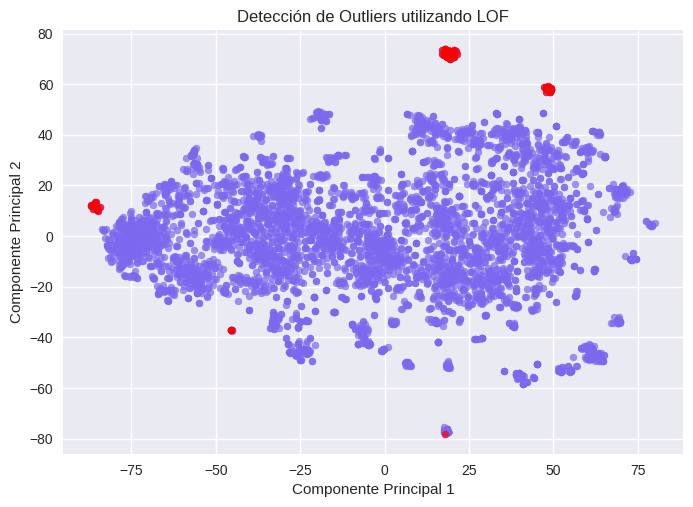

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.7, color = 'mediumslateblue', marker = 'o', s = 25)
ax.scatter(X_tsne[outliers_tsne, 0], X_tsne[outliers_tsne, 1], alpha=0.7, color = 'red', marker = 'o', s = 25)
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_title('Detección de Outliers utilizando LOF')
plt.show()

In [ ]:
outliers_ims  = detect_outliers(X_ism, 100)

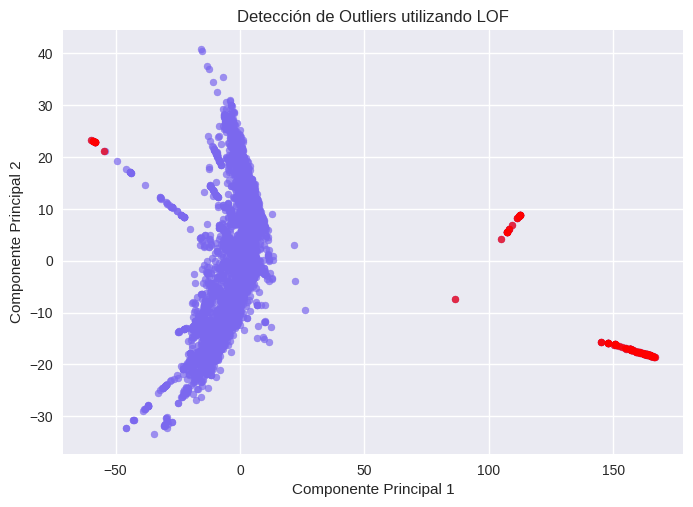

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_ism[:, 0], X_ism[:, 1], alpha=0.7, color = 'mediumslateblue', marker = 'o', s = 25)
ax.scatter(X_ism[outliers_ism, 0], X_ism[outliers_ism, 1], alpha=0.7, color = 'red', marker = 'o', s = 25)
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_title('Detección de Outliers utilizando LOF')
plt.show()

In [ ]:
outliers_umap = detect_outliers(X_umap, 400)

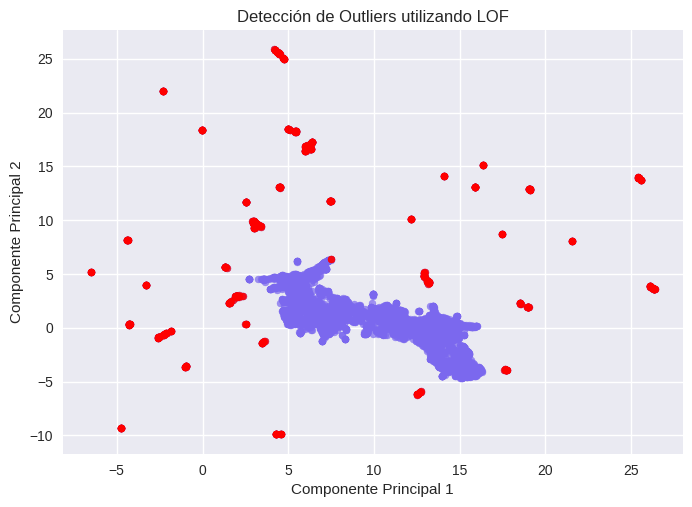

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.7, color = 'mediumslateblue', marker = 'o', s = 25)
ax.scatter(X_umap[outliers_umap, 0], X_umap[outliers_umap, 1], alpha=0.7, color = 'red', marker = 'o', s = 25)
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_title('Detección de Outliers utilizando LOF')
plt.show()

In [ ]:
outliers_nei = count_and_filter(2, outliers_pca , outliers_mds, outliers_mds, outliers_ism, outliers_umap)

In [ ]:
len(outliers_nei)

109

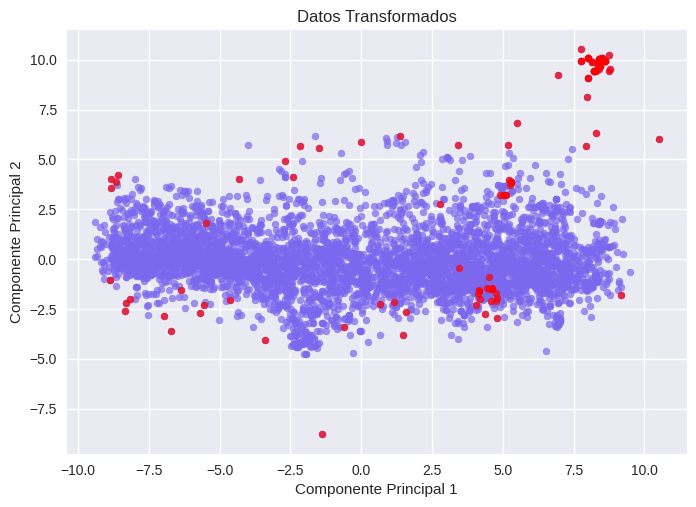

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, color = 'mediumslateblue', marker = 'o', s = 25)
ax.scatter(X_pca[outliers_nei, 0], X_pca[outliers_nei, 1], alpha=0.7, color = 'red', marker = 'o', s = 25)
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_title(f'Datos Transformados')
plt.show()

Isolation Forest

In [ ]:
def detect_outliers_isolation(X, contamination):
    isolation_forest = IsolationForest(contamination=contamination)
    outlier_scores = isolation_forest.fit_predict(X)

    outlier_indices = np.where(outlier_scores == -1)[0]

    return outlier_indices

In [ ]:
outliers_pca = detect_outliers_isolation(X_pca, 0.01)

In [ ]:
len(outliers_pca)

50

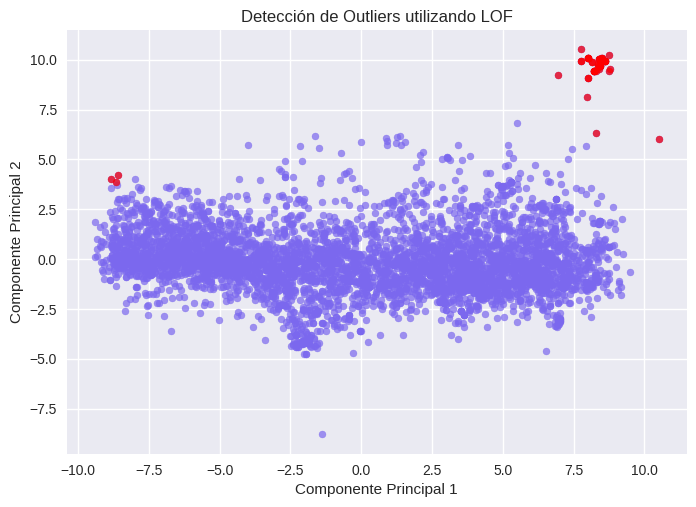

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, color = 'mediumslateblue', marker = 'o', s = 25)
ax.scatter(X_pca[outliers_pca, 0], X_pca[outliers_pca, 1], alpha=0.7, color = 'red', marker = 'o', s = 25)
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_title('Detección de Outliers utilizando LOF')
plt.show()

In [ ]:
outliers_mds = detect_outliers_isolation(X_mds, 0.01)

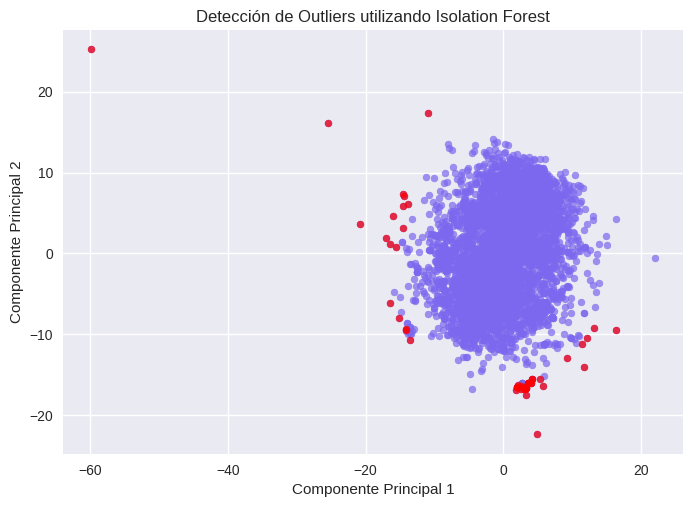

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_mds[:, 0], X_mds[:, 1], alpha=0.7, color = 'mediumslateblue', marker = 'o', s = 25)
ax.scatter(X_mds[outliers_mds, 0], X_mds[outliers_mds, 1], alpha=0.7, color = 'red', marker = 'o', s = 25)
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_title('Detección de Outliers utilizando Isolation Forest')
plt.show()

In [ ]:
outliers_tsne = detect_outliers_isolation(X_tsne, 0.01)

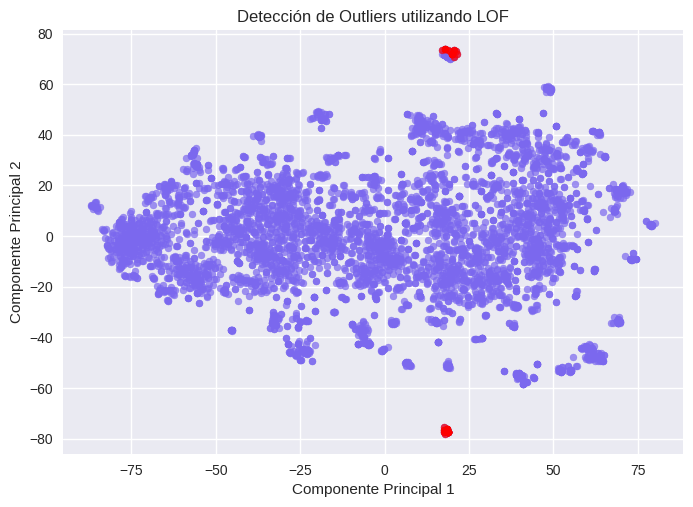

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.7, color = 'mediumslateblue', marker = 'o', s = 25)
ax.scatter(X_tsne[outliers_tsne, 0], X_tsne[outliers_tsne, 1], alpha=0.7, color = 'red', marker = 'o', s = 25)
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_title('Detección de Outliers utilizando LOF')
plt.show()

In [ ]:
outliers_ims  = detect_outliers_isolation(X_ism, 0.01)

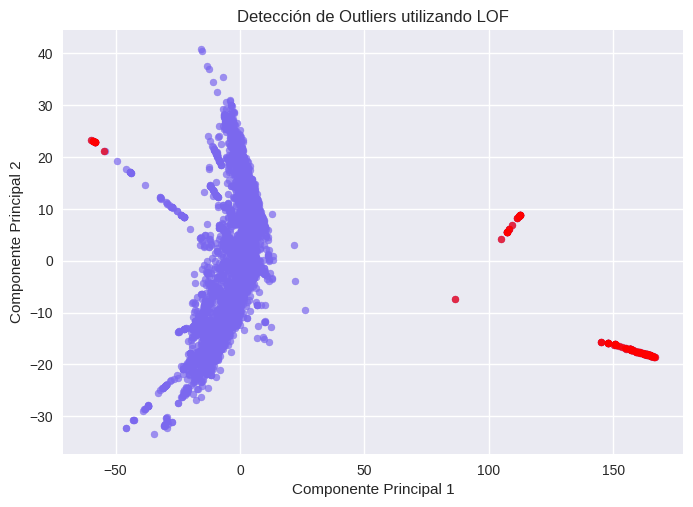

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_ism[:, 0], X_ism[:, 1], alpha=0.7, color = 'mediumslateblue', marker = 'o', s = 25)
ax.scatter(X_ism[outliers_ism, 0], X_ism[outliers_ism, 1], alpha=0.7, color = 'red', marker = 'o', s = 25)
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_title('Detección de Outliers utilizando LOF')
plt.show()

In [ ]:
outliers_umap = detect_outliers_isolation(X_umap, 0.01)

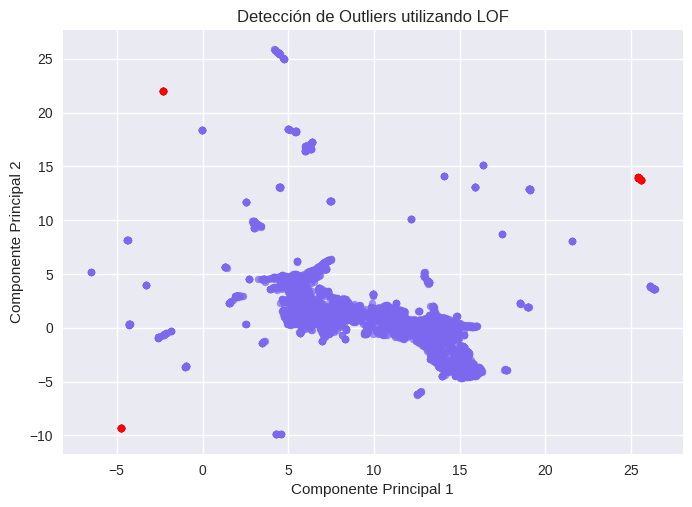

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.7, color = 'mediumslateblue', marker = 'o', s = 25)
ax.scatter(X_umap[outliers_umap, 0], X_umap[outliers_umap, 1], alpha=0.7, color = 'red', marker = 'o', s = 25)
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_title('Detección de Outliers utilizando LOF')
plt.show()

In [ ]:
outliers_if = count_and_filter(2, outliers_pca , outliers_mds, outliers_mds, outliers_ism, outliers_umap)

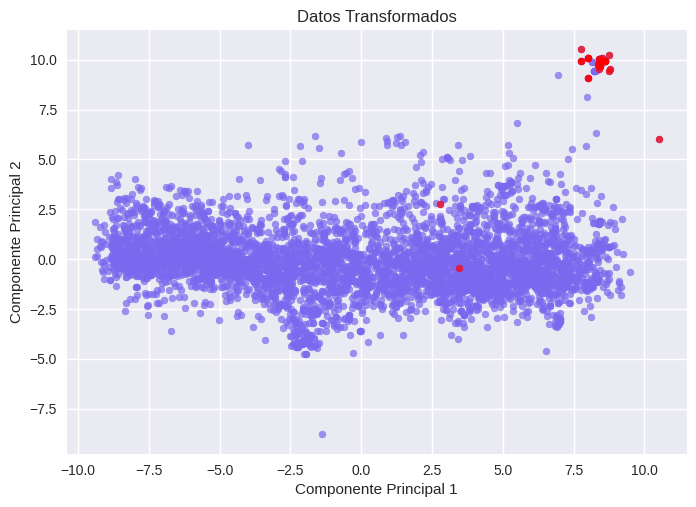

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, color = 'mediumslateblue', marker = 'o', s = 25)
ax.scatter(X_pca[outliers_if, 0], X_pca[outliers_if, 1], alpha=0.7, color = 'red', marker = 'o', s = 25)
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_title(f'Datos Transformados')
plt.show()

In [ ]:
len(outliers_if)

30

In [ ]:
outliers = count_and_filter(2, outliers_kmeans, outliers_if, outliers_nei)

In [ ]:
len(outliers)

30

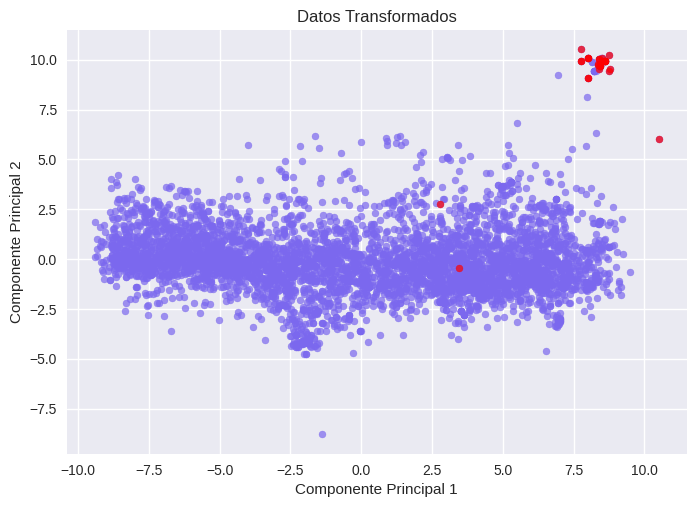

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, color = 'mediumslateblue', marker = 'o', s = 25)
ax.scatter(X_pca[outliers, 0], X_pca[outliers, 1], alpha=0.7, color = 'red', marker = 'o', s = 25)
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_title(f'Datos Transformados')
plt.show()

In [ ]:
outliers = pd.Series(outliers, name = 'Anomalias')

In [ ]:
outliers.to_csv('anomalias.csv', index=False)